In [3]:
!cd .. && mkdir build
!cd build/ && rm -rf *
!cd ../build/ && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install
!cp metnum.cpython-* ../scripts

mkdir: cannot create directory ‘build’: File exists
/bin/bash: line 0: cd: build/: No such file or directory
Release mode
-- pybind11 v2.2.4
CMAKE_INSTALL_PREFIX=/home/msorondo/Desktop/Metodos Numericos/TP2/metnum-tp2
-- Configuring done
-- Generating done
-- Build files have been written to: /home/msorondo/Desktop/Metodos Numericos/TP2/metnum-tp2/build
[ 50%] Built target tp2
[100%] Built target metnum
Install the project...
-- Install configuration: "Release"
-- Up-to-date: /home/msorondo/Desktop/Metodos Numericos/TP2/metnum-tp2/notebooks/metnum.cpython-38-x86_64-linux-gnu.so
cp: 'metnum.cpython-38-x86_64-linux-gnu.so' and '../scripts/metnum.cpython-38-x86_64-linux-gnu.so' are the same file


In [4]:
import metnum
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
import time

In [5]:

df_train = pd.read_csv("../data/train.csv")

df_train = df_train.iloc[0:10000,:]

X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)


limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

In [21]:

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

accuracy_con_pca = []
performance = []
for i in range(1,50):
    start =  time.process_time()
    pca = metnum.PCA(i)
    pca.fit(X_train)
    X_train_PCA = pca.transform(X_train)

    X_val_PCA = pca.transform(X_val)

    clf_metnum = metnum.KNNClassifier(3)
    clf_metnum.fit(X_train_PCA, y_train)
    acc = accuracy_score(clf_metnum.predict(X_val_PCA), y_val)
    end = time.process_time()
    time_performance = end - start
    accuracy_con_pca.append(acc)
    performance.append(time_performance)
    print("Alpha: {}. Accuracy: {}. Duration: {}".format(i, acc, time_performance))

#for i in range(1,50,3):
 #   start = time.process_time()

  #  clf_metnum = metnum.KNNClassifier(i)
  #  clf_metnum.fit(X_train, y_train)
  #  acc = accuracy_score(clf_metnum.predict(X_val), y_val)
   # end = time.process_time()
   # time_performance = end - start
   # accuracy_sin_pca.append(acc)
   # print("Alpha: {}. Accuracy: {}. Duration: {}".format(i, acc, time_performance))

Ahora tengo 8000 instancias de entrenamiento y 2000 de validación
Alpha: 1. Accuracy: 0.261. Duration: 1.64743359900001
Alpha: 2. Accuracy: 0.3965. Duration: 1.606135461000008
Alpha: 3. Accuracy: 0.4955. Duration: 1.7542708269999139
Alpha: 4. Accuracy: 0.6155. Duration: 1.7053522880000855
Alpha: 5. Accuracy: 0.717. Duration: 1.6280199060000768
Alpha: 6. Accuracy: 0.7995. Duration: 1.635060373999977
Alpha: 7. Accuracy: 0.8505. Duration: 1.700947279999923
Alpha: 8. Accuracy: 0.8715. Duration: 1.771118021999996
Alpha: 9. Accuracy: 0.8935. Duration: 1.810485420999953
Alpha: 10. Accuracy: 0.9045. Duration: 1.8778748610000093
Alpha: 11. Accuracy: 0.9145. Duration: 2.1325983049999877
Alpha: 12. Accuracy: 0.9205. Duration: 2.247183279000069
Alpha: 13. Accuracy: 0.933. Duration: 2.7232513490000656
Alpha: 14. Accuracy: 0.945. Duration: 2.788111315999913
Alpha: 15. Accuracy: 0.941. Duration: 2.818097835000003
Alpha: 16. Accuracy: 0.9525. Duration: 2.966194683999902
Alpha: 17. Accuracy: 0.9545. Du

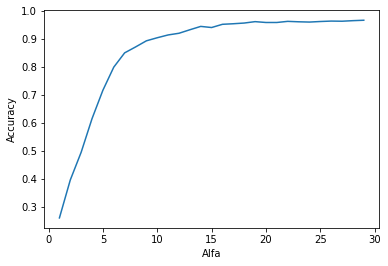

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
df_comparacion = pd.Series(accuracy_con_pca)
plt.figure()
plt.xlabel("Alfa")
plt.ylabel("Accuracy")
plt.plot(range(1,30,1),df_comparacion[:29])
plt.savefig("./graphics/mejorAlfa.jpg")

In [27]:
start = time.process_time()
clf_noPCA = metnum.KNNClassifier(3)
clf_noPCA.fit(X_train,y_train)
res = clf_noPCA.predict(X_val)

end = time.process_time()

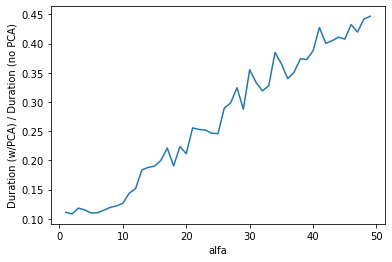

In [32]:
performance = pd.Series(performance)
noPCA_performance = end-start
plt.figure()
plt.xlabel("alfa")
plt.ylabel("Duration (w/PCA) / Duration (no PCA)")
plt.plot(range(1,50,1),abs(performance/noPCA_performance))
plt.savefig("./graphics/performanceByAlpha.jpg")